In [5]:
# help(Conv1D)

Help on class Conv1D in module keras.layers.convolutional:

class Conv1D(Conv)
 |  Conv1D(*args, **kwargs)
 |  
 |  1D convolution layer (e.g. temporal convolution).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input over a single spatial (or temporal) dimension
 |  to produce a tensor of outputs.
 |  If `use_bias` is True, a bias vector is created and added to the outputs.
 |  Finally, if `activation` is not `None`,
 |  it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide an `input_shape` argument
 |  (tuple of integers or `None`, e.g.
 |  `(10, 128)` for sequences of 10 vectors of 128-dimensional vectors,
 |  or `(None, 128)` for variable-length sequences of 128-dimensional vectors.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 128-length vectors with 10 timesteps, and the batch size
 |  >>> # is 4.
 |  >>> input_shape = (4, 10, 128)
 |  >>> x = tf.random.normal(input_shape)
 |  >>>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

17473536/17464789 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56

In [2]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 21s 16ms/step - loss: 0.4070 - accuracy: 0.8015 - val_loss: 0.2901 - val_accuracy: 0.8749
Epoch 2/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2348 - accuracy: 0.9087 - val_loss: 0.2662 - val_accuracy: 0.8891
Epoch 3/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1859 - accuracy: 0.9298 - val_loss: 0.2706 - val_accuracy: 0.8909
Epoch 4/100
469/469 [==============================] - 7s 16ms/step - loss: 0.1501 - accuracy: 0.9460 - val_loss: 0.2887 - val_accuracy: 0.8794
Epoch 5/100
782/782 [==============================] - 4s 6ms/step - loss: 0.3328 - accuracy: 0.8805

 Test Accuracy: 0.8805


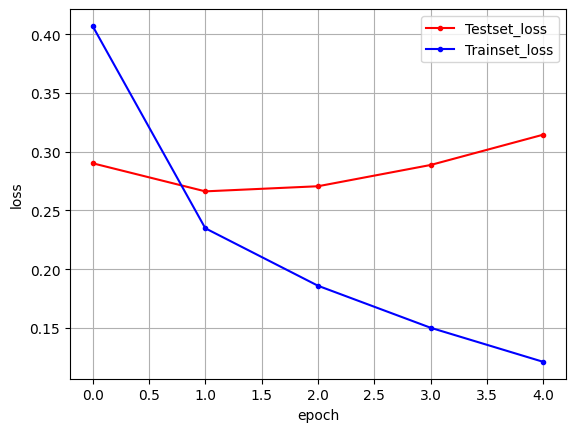

In [3]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [4]:
X_train.shape

(25000, 500)